## Prova 01

Objetivo: 
Desenvolver habilidades em web scraping para coletar dados de preços de imóveis e 
aplicar regressão linear para prever preços com base em características dos imóveis. 
Descrição da Atividade: 
1. Web Scraping: 
• Utilize uma biblioteca de web scraping, como BeautifulSoup ou Scrapy, 
para coletar dados de um site de listagem de imóveis (por exemplo, OLX, 
VivaReal, DF Imoveis, etc.). 
• Extraia informações relevantes, como preço, localização, número de 
quartos, área em metros quadrados, e outras características disponíveis. 
2. Análise de Dados: 
• Limpe e organize os dados coletados, tratando valores ausentes e 
removendo outliers. 
• Realize uma análise exploratória dos dados para entender a distribuição e 
as relações entre as variáveis. 
3. Regressão Linear: 
• Divida os dados em conjuntos de treino e teste. 
• Utilize uma biblioteca de machine learning, como Scikit-learn, para treinar 
um modelo de regressão linear que preveja o preço dos imóveis com base 
nas características coletadas. 
• Avalie a performance do modelo utilizando métricas apropriadas, como o 
R² e o erro quadrático médio (MSE). 
4. Visualização de Dados: 
• Crie visualizações para apresentar os resultados da análise e do modelo 
de regressão linear. Utilize bibliotecas como Matplotlib ou Seaborn para 
gerar gráficos de dispersão, histogramas, e gráficos de linha. 

## Web Scraping

Site selecionado: DF Imoveis


Dados de Aluguel

In [28]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

base_url = "https://www.dfimoveis.com.br/aluguel/df/brasilia/imoveis"

nomes = []
tipos = []
areas = []
precos = []
quartos = []
suites = []
vagas = []

for pagina in range(1, 201): 
    print(f"Scraping página {pagina}...")
    url = f"{base_url}?pagina={pagina}"  
    response = requests.get(url)
    
    if response.status_code != 200:
        print(f"Erro ao acessar a página {pagina}")
        continue
    
    soup = BeautifulSoup(response.content, 'html.parser')

    imoveis = soup.find_all('a', class_='new-card')  

    for imovel in imoveis:

        nome = imovel.find('h2', class_='new-title phrase')
        nomes.append(nome.text.strip() if nome else "N/A")

        tipo = imovel.find('h3', class_='new-desc phrase')
        tipos.append(tipo.text.strip() if tipo else "N/A")

        area = imovel.find('li', class_='m-area')
        areas.append(area.text.strip() if area else "N/A")

        preco = imovel.find('div', class_='new-price')
        precos.append(preco.text.strip() if preco else "N/A")

        quarto = imovel.find('span', text=re.compile(r'Quartos'))
        quartos.append(int(quarto.text.split()[0]) if quarto else 0)

        suite = imovel.find('span', text=re.compile(r'Suíte'))
        suites.append(int(suite.text.split()[0]) if suite else 0)

        vaga = imovel.find('span', text=re.compile(r'Vagas'))
        vagas.append(int(vaga.text.split()[0]) if vaga else 0)


df = pd.DataFrame({
    'Nome': nomes,
    'Tipo': tipos,
    'Área m2': areas,
    'Preço R$': precos,
    'quartos': quartos,
    'suites' : suites,
    'vagas' : vagas
})

df.to_csv('imoveis_multiplas_paginas.csv', index=False, encoding='utf-8')

Scraping página 1...


C:\Users\marco\AppData\Local\Temp\ipykernel_7352\236292704.py:43: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  quarto = imovel.find('span', text=re.compile(r'Quartos'))
C:\Users\marco\AppData\Local\Temp\ipykernel_7352\236292704.py:46: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  suite = imovel.find('span', text=re.compile(r'Suíte'))
C:\Users\marco\AppData\Local\Temp\ipykernel_7352\236292704.py:49: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  vaga = imovel.find('span', text=re.compile(r'Vagas'))


Scraping página 2...
Scraping página 3...
Scraping página 4...
Scraping página 5...
Scraping página 6...
Scraping página 7...
Scraping página 8...
Scraping página 9...
Scraping página 10...
Scraping página 11...
Scraping página 12...
Scraping página 13...
Scraping página 14...
Scraping página 15...
Scraping página 16...
Scraping página 17...
Scraping página 18...
Scraping página 19...
Scraping página 20...
Scraping página 21...
Scraping página 22...
Scraping página 23...
Scraping página 24...
Scraping página 25...
Scraping página 26...
Scraping página 27...
Scraping página 28...
Scraping página 29...
Scraping página 30...
Scraping página 31...
Scraping página 32...
Scraping página 33...
Scraping página 34...
Scraping página 35...
Scraping página 36...
Scraping página 37...
Scraping página 38...
Scraping página 39...
Scraping página 40...
Scraping página 41...
Scraping página 42...
Scraping página 43...
Scraping página 44...
Scraping página 45...
Scraping página 46...
Scraping página 47

Visualização do resultado

In [29]:
df

,Nome,Tipo,Área m2,Preço R$,quartos,suites,vagas
0,"SRTVS Bloco M Lote 12, ASA SUL, BRASILIA",Aluguel Loja 380 m²,380 m²,R$ 12.490\nValor m² R$ 32,0,0,2
1,"SCS Quadra 08 Bloco B LoteS 50/60, ASA SUL, BR...",Aluguel Sala 1261 m²,1261 m²,R$ 63.065\nValor m² R$ 50,0,0,0
2,"SHS Quadra 6 Conjunto A Bloco C, ASA SUL, BRAS...",Aluguel Loja 390 m²,390 m²,R$ 25.000\nValor m² R$ 64,0,0,0
3,"SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...",Aluguel Loja 86 m²,86 m²,R$ 10.285\nValor m² R$ 119,0,0,0
4,"SHIS QI 9/11 Bloco B, LAGO SUL, BRASILIA",Aluguel Loja 300 m²,300 m²,R$ 25.000\nValor m² R$ 83,0,0,0
...,...,...,...,...,...,...,...
3502,"Condomínio Residencial Mansões Itaipu, JARDIM ...",Aluguel Casa Condominio 300 m²,300 m²,R$ 12.000\nValor m² R$ 40,3,2,4
3503,"SQN 205 Bloco J, ASA NORTE, BRASILIA",Aluguel Apartamento 143 m²,143 m²,R$ 5.000\nValor m² R$ 34,3,1,0
3504,"AOS 01 Bloco F, OCTOGONAL, BRASILIA",Aluguel Apartamento 64 m²,64 m²,R$ 3.000\nValor m² R$ 46,3,1,0
3505,"SGCV Lote 13, PARK SUL, BRASILIA",Aluguel Apartamento 27 m²,27 m²,R$ 2.400\nValor m² R$ 88,0,1,0


## Separando e limpando a base

Construção de colunas:
- Nome: endereço da residencia;
- Bairro: Bairro;
- Tipo: Loja, Sala, Casa Conndominio etc;
- Área: apenas valor, todos estão em m²;
- Preço: apenas valor, todos são R$;
- Cidade: estado da residencia;


In [30]:
data = pd.read_csv('imoveis_multiplas_paginas.csv', encoding='utf-8')
data['Bairro'] = data['Nome'].str.split(',').str[1].str.strip()
data['Cidade'] = data['Nome'].str.split(',').str[-1].str.strip()
data['Tipo'] = data['Tipo'].str.extract(r'Aluguel\s+(.*?)\s+\d', expand=False)
data['Área m2'] = data['Área m2'].str.replace('m²', '').str.replace(' ', '')
data['Preço R$'] = data['Preço R$'].str.extract(r'(\d[\d\.]*)', expand=False)
data['Preço R$'] = pd.to_numeric(data['Preço R$'].str.replace('.', '', regex=False), errors='coerce')
data

,Nome,Tipo,Área m2,Preço R$,quartos,suites,vagas,Bairro,Cidade
0,"SRTVS Bloco M Lote 12, ASA SUL, BRASILIA",Loja,380,12490,0,0,2,ASA SUL,BRASILIA
1,"SCS Quadra 08 Bloco B LoteS 50/60, ASA SUL, BR...",Sala,1261,63065,0,0,0,ASA SUL,BRASILIA
2,"SHS Quadra 6 Conjunto A Bloco C, ASA SUL, BRAS...",Loja,390,25000,0,0,0,ASA SUL,BRASILIA
3,"SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...",Loja,86,10285,0,0,0,ASA SUL,BRASILIA
4,"SHIS QI 9/11 Bloco B, LAGO SUL, BRASILIA",Loja,300,25000,0,0,0,LAGO SUL,BRASILIA
...,...,...,...,...,...,...,...,...,...
3502,"Condomínio Residencial Mansões Itaipu, JARDIM ...",Casa Condominio,300,12000,3,2,4,JARDIM BOTANICO,BRASILIA
3503,"SQN 205 Bloco J, ASA NORTE, BRASILIA",Apartamento,143,5000,3,1,0,ASA NORTE,BRASILIA
3504,"AOS 01 Bloco F, OCTOGONAL, BRASILIA",Apartamento,64,3000,3,1,0,OCTOGONAL,BRASILIA
3505,"SGCV Lote 13, PARK SUL, BRASILIA",Apartamento,27,2400,0,1,0,PARK SUL,BRASILIA


## Estudos dos dados

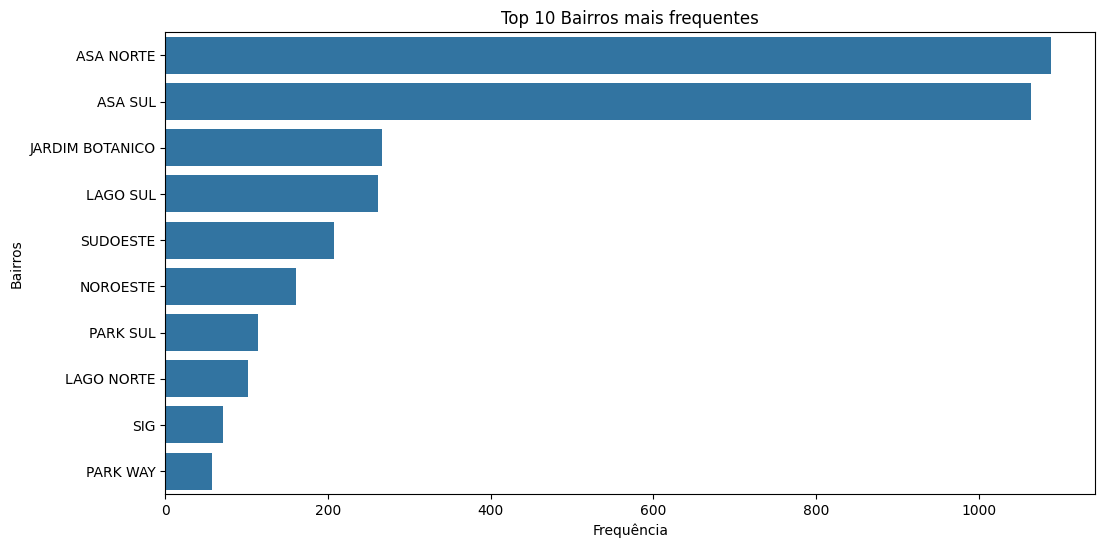

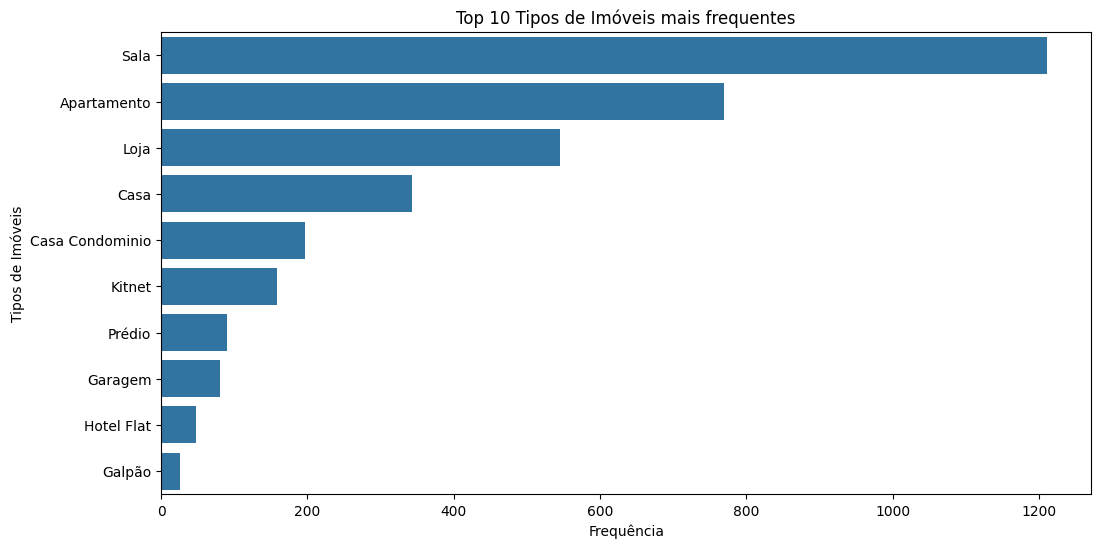

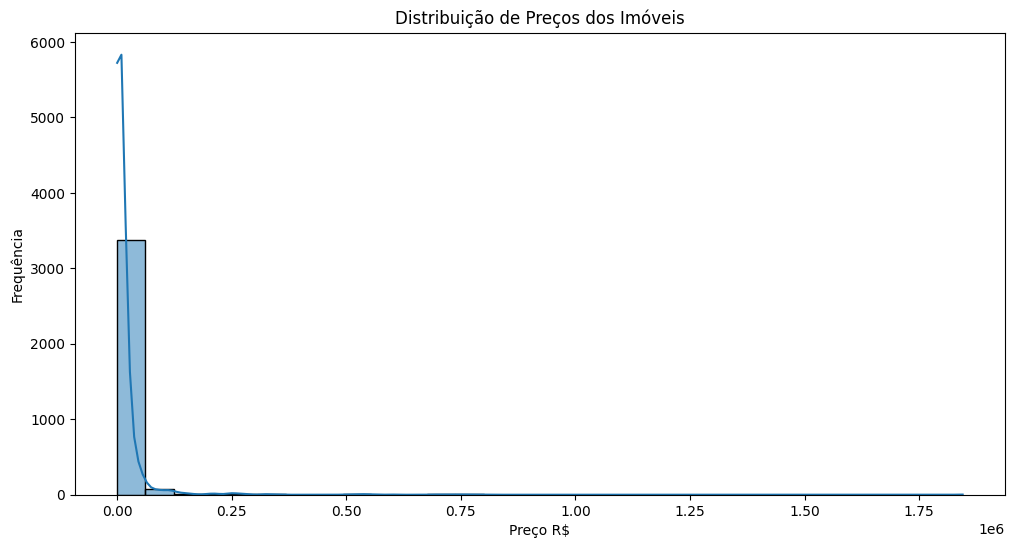

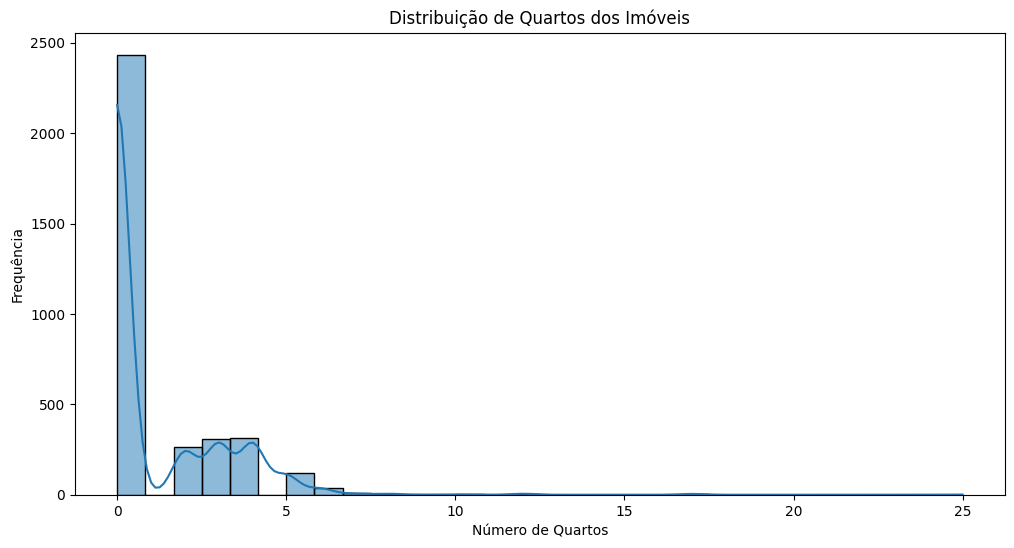

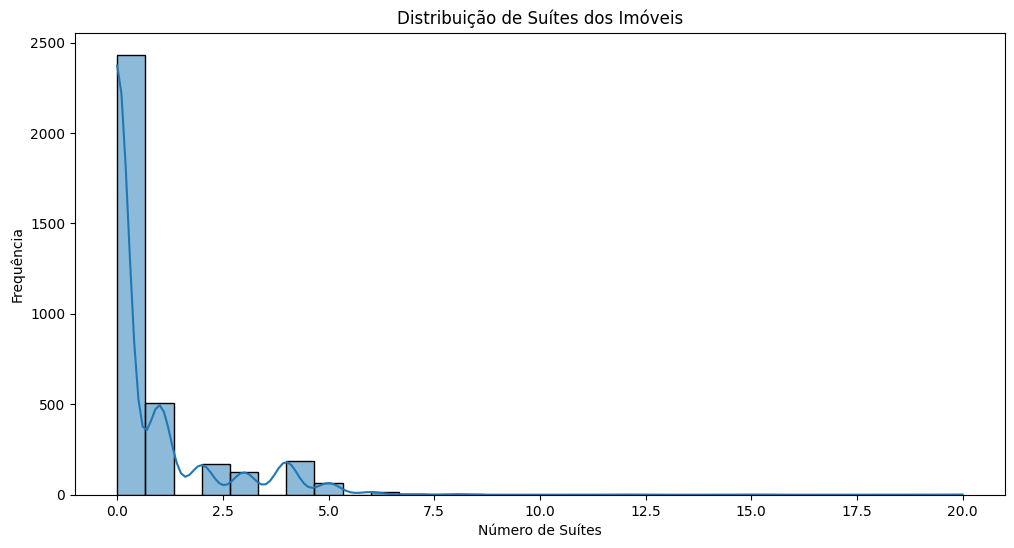

In [31]:
#Presença de bairros e tipos
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Bairro', order=data['Bairro'].value_counts().index[:10])
plt.title('Top 10 Bairros mais frequentes')

plt.xlabel('Frequência')
plt.ylabel('Bairros')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=data, y='Tipo', order=data['Tipo'].value_counts().index[:10])
plt.title('Top 10 Tipos de Imóveis mais frequentes')

plt.xlabel('Frequência')
plt.ylabel('Tipos de Imóveis')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Preço R$', bins=30, kde=True)
plt.title('Distribuição de Preços dos Imóveis')
plt.xlabel('Preço R$')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='quartos', bins=30, kde=True)
plt.title('Distribuição de Quartos dos Imóveis')
plt.xlabel('Número de Quartos')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='suites', bins=30, kde=True)
plt.title('Distribuição de Suítes dos Imóveis')
plt.xlabel('Número de Suítes')
plt.ylabel('Frequência')
plt.show()


Bairros:

Presensa desequilibrada, grande quantidade de Asa Norte e Asa Sul. (enviesamento)

Tipos:

Imóveis do tipo Sala se destaca perante os demais. (enviesamento)

In [32]:
tipo_counts = data['Tipo'].value_counts()
bairro_counts = data['Bairro'].value_counts()
print(f"Quantidade de bairros: \n {bairro_counts}")
print(f"Quantidade de tipos de imóveis: \n {tipo_counts}")

Quantidade de bairros: 
 Bairro
ASA NORTE                     1089
ASA SUL                       1064
JARDIM BOTANICO                266
LAGO SUL                       261
SUDOESTE                       207
NOROESTE                       160
PARK SUL                       114
LAGO NORTE                     101
SIG                             71
PARK WAY                        57
JARDINS MANGUEIRAL              52
B E C Lote 05                   21
OCTOGONAL                       11
TAQUARI                         11
ALTIPLANO LESTE                  8
VILA PLANALTO                    8
ZONA CIVICO ADMINISTRATIVA       2
GRANJA DO TORTO                  1
5   CPC Olhos D Água             1
10 E 20                          1
SETOR MILITAR URBANO             1
Name: count, dtype: int64
Quantidade de tipos de imóveis: 
 Tipo
Sala                 1211
Apartamento           769
Loja                  545
Casa                  343
Casa Condominio       196
Kitnet                158
Prédio      

Filtro de Bairros e Tipos < 100

In [33]:
bairros_frequentes = data['Bairro'].value_counts()
tipos_frequentes = data['Tipo'].value_counts()

bairros_validos = bairros_frequentes[bairros_frequentes >= 100].index
tipos_validos = tipos_frequentes[tipos_frequentes >= 100].index

data_filtrada = data[data['Bairro'].isin(bairros_validos) & data['Tipo'].isin(tipos_validos)]

data_filtrada = data_filtrada[data_filtrada['Tipo'] != 'Sala']

print("Distribuição de Bairros após o filtro:")
print(data_filtrada['Bairro'].value_counts())

print("\nDistribuição de Tipos após o filtro:")
print(data_filtrada['Tipo'].value_counts())

Distribuição de Bairros após o filtro:
Bairro
ASA NORTE          510
ASA SUL            384
JARDIM BOTANICO    240
LAGO SUL           227
SUDOESTE           194
NOROESTE           152
PARK SUL            87
LAGO NORTE          81
Name: count, dtype: int64

Distribuição de Tipos após o filtro:
Tipo
Apartamento        737
Loja               517
Casa               294
Casa Condominio    174
Kitnet             153
Name: count, dtype: int64


Verificando a presença de Outliers

In [34]:
data_filtrada

,Nome,Tipo,Área m2,Preço R$,quartos,suites,vagas,Bairro,Cidade
0,"SRTVS Bloco M Lote 12, ASA SUL, BRASILIA",Loja,380,12490,0,0,2,ASA SUL,BRASILIA
2,"SHS Quadra 6 Conjunto A Bloco C, ASA SUL, BRAS...",Loja,390,25000,0,0,0,ASA SUL,BRASILIA
3,"SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...",Loja,86,10285,0,0,0,ASA SUL,BRASILIA
4,"SHIS QI 9/11 Bloco B, LAGO SUL, BRASILIA",Loja,300,25000,0,0,0,LAGO SUL,BRASILIA
5,"EQS 114/115, ASA SUL, BRASILIA",Loja,70,4500,0,0,0,ASA SUL,BRASILIA
...,...,...,...,...,...,...,...,...,...
3500,"SQS 305 Bloco A, ASA SUL, BRASILIA",Apartamento,132,5500,3,0,0,ASA SUL,BRASILIA
3501,"SGCV Lote 10, PARK SUL, BRASILIA",Apartamento,27,2800,0,1,0,PARK SUL,BRASILIA
3502,"Condomínio Residencial Mansões Itaipu, JARDIM ...",Casa Condominio,300,12000,3,2,4,JARDIM BOTANICO,BRASILIA
3503,"SQN 205 Bloco J, ASA NORTE, BRASILIA",Apartamento,143,5000,3,1,0,ASA NORTE,BRASILIA


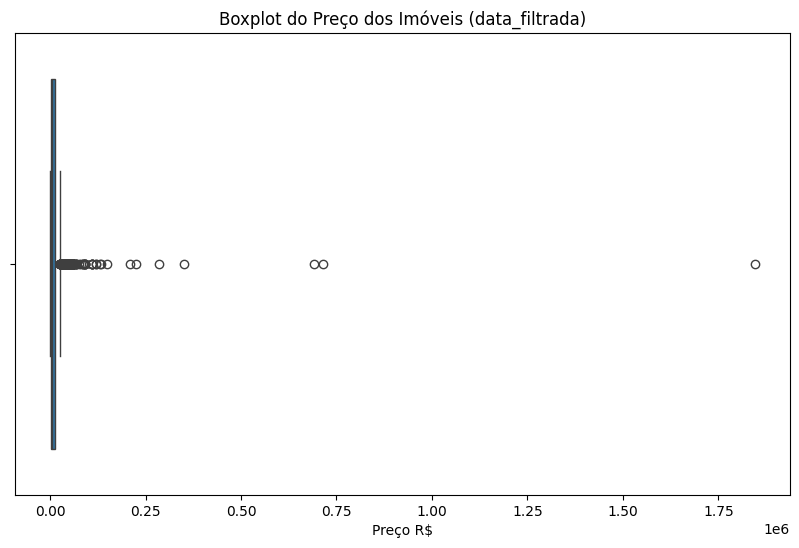

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtrada, x='Preço R$')
plt.title('Boxplot do Preço dos Imóveis (data_filtrada)')
plt.xlabel('Preço R$')
plt.show()

In [36]:
data_filtrada = data_filtrada[data_filtrada['Preço R$'] <= 18_000]
data_filtrada = data_filtrada[data_filtrada['Preço R$'] >= 1_000]

print("Dados filtrados (preço <= 18 mil):")
print(data_filtrada)

Dados filtrados (preço <= 18 mil):
                                                   Nome             Tipo  \
0              SRTVS Bloco M Lote 12, ASA SUL, BRASILIA             Loja   
3     SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...             Loja   
5                        EQS 114/115, ASA SUL, BRASILIA             Loja   
10    Condomínio Morada de Deus, JARDIM BOTANICO, BR...  Casa Condominio   
11    Condomínio Ouro Vermelho I, JARDIM BOTANICO, B...  Casa Condominio   
...                                                 ...              ...   
3500                 SQS 305 Bloco A, ASA SUL, BRASILIA      Apartamento   
3501                   SGCV Lote 10, PARK SUL, BRASILIA      Apartamento   
3502  Condomínio Residencial Mansões Itaipu, JARDIM ...  Casa Condominio   
3503               SQN 205 Bloco J, ASA NORTE, BRASILIA      Apartamento   
3505                   SGCV Lote 13, PARK SUL, BRASILIA      Apartamento   

     Área m2  Preço R$  quartos  suites  vagas      

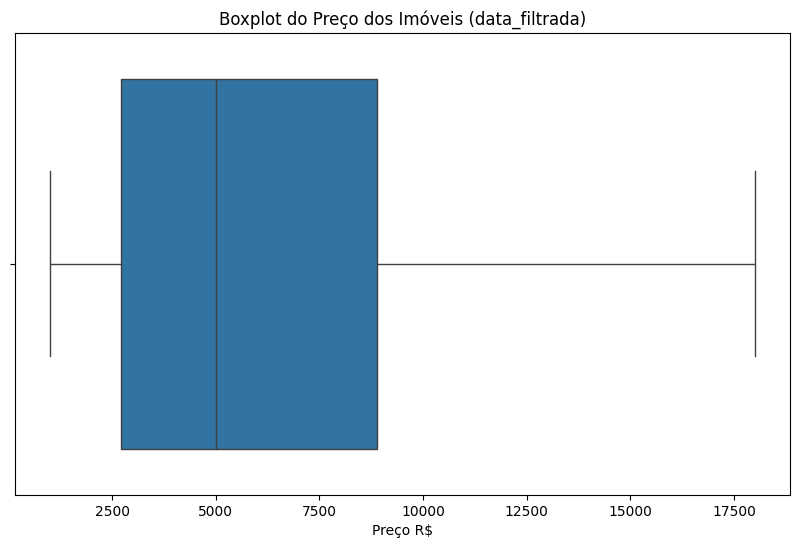

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_filtrada, x='Preço R$')
plt.title('Boxplot do Preço dos Imóveis (data_filtrada)')
plt.xlabel('Preço R$')
plt.show()

## Convertendo textos para numeros

In [38]:
data_filtrada

,Nome,Tipo,Área m2,Preço R$,quartos,suites,vagas,Bairro,Cidade
0,"SRTVS Bloco M Lote 12, ASA SUL, BRASILIA",Loja,380,12490,0,0,2,ASA SUL,BRASILIA
3,"SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...",Loja,86,10285,0,0,0,ASA SUL,BRASILIA
5,"EQS 114/115, ASA SUL, BRASILIA",Loja,70,4500,0,0,0,ASA SUL,BRASILIA
10,"Condomínio Morada de Deus, JARDIM BOTANICO, BR...",Casa Condominio,500,7500,5,3,4,JARDIM BOTANICO,BRASILIA
11,"Condomínio Ouro Vermelho I, JARDIM BOTANICO, B...",Casa Condominio,850,11000,5,2,3,JARDIM BOTANICO,BRASILIA
...,...,...,...,...,...,...,...,...,...
3500,"SQS 305 Bloco A, ASA SUL, BRASILIA",Apartamento,132,5500,3,0,0,ASA SUL,BRASILIA
3501,"SGCV Lote 10, PARK SUL, BRASILIA",Apartamento,27,2800,0,1,0,PARK SUL,BRASILIA
3502,"Condomínio Residencial Mansões Itaipu, JARDIM ...",Casa Condominio,300,12000,3,2,4,JARDIM BOTANICO,BRASILIA
3503,"SQN 205 Bloco J, ASA NORTE, BRASILIA",Apartamento,143,5000,3,1,0,ASA NORTE,BRASILIA


In [39]:
print(f"Tipos unicos: {data_filtrada['Tipo'].unique()}")

print(f"Bairros unicos: {data_filtrada['Bairro'].unique()}")

Tipos unicos: ['Loja' 'Casa Condominio' 'Casa' 'Apartamento' 'Kitnet']
Bairros unicos: ['ASA SUL' 'JARDIM BOTANICO' 'LAGO SUL' 'SUDOESTE' 'NOROESTE' 'ASA NORTE'
 'PARK SUL' 'LAGO NORTE']


Tradução: 


Tipos:

    Loja : 1
    Apartamento : 2
    Casa : 3
    Casa Condominio : 4
    Kitnet : 5

Bairros:

    ASA SUL : 1
    LAGO SUL : 2
    SUDOESTE : 3
    JARDIM BOTANICO : 4
    NOROESTE : 5
    ASA NORTE : 6
    PARK SUL : 7
    LAGO NORTE : 8

In [40]:
tipo_mapping = {
    'Loja': 1,
    'Apartamento': 2,
    'Casa': 3,
    'Casa Condominio': 4,
    'Kitnet': 5
}

bairro_mapping = {
    'ASA SUL': 1,
    'LAGO SUL': 2,
    'SUDOESTE': 3,
    'JARDIM BOTANICO': 4,
    'NOROESTE': 5,
    'ASA NORTE': 6,
    'PARK SUL': 7,
    'LAGO NORTE': 8
}

# Ensure the columns contain string values before applying .str.strip()
data_filtrada['Tipo'] = data_filtrada['Tipo'].astype(str).str.strip()
data_filtrada['Bairro'] = data_filtrada['Bairro'].astype(str).str.strip()

data_filtrada['Tipo'] = data_filtrada['Tipo'].map(tipo_mapping)
data_filtrada['Bairro'] = data_filtrada['Bairro'].map(bairro_mapping)

data_filtrada

,Nome,Tipo,Área m2,Preço R$,quartos,suites,vagas,Bairro,Cidade
0,"SRTVS Bloco M Lote 12, ASA SUL, BRASILIA",1,380,12490,0,0,2,1,BRASILIA
3,"SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...",1,86,10285,0,0,0,1,BRASILIA
5,"EQS 114/115, ASA SUL, BRASILIA",1,70,4500,0,0,0,1,BRASILIA
10,"Condomínio Morada de Deus, JARDIM BOTANICO, BR...",4,500,7500,5,3,4,4,BRASILIA
11,"Condomínio Ouro Vermelho I, JARDIM BOTANICO, B...",4,850,11000,5,2,3,4,BRASILIA
...,...,...,...,...,...,...,...,...,...
3500,"SQS 305 Bloco A, ASA SUL, BRASILIA",2,132,5500,3,0,0,1,BRASILIA
3501,"SGCV Lote 10, PARK SUL, BRASILIA",2,27,2800,0,1,0,7,BRASILIA
3502,"Condomínio Residencial Mansões Itaipu, JARDIM ...",4,300,12000,3,2,4,4,BRASILIA
3503,"SQN 205 Bloco J, ASA NORTE, BRASILIA",2,143,5000,3,1,0,6,BRASILIA


In [41]:
data_filtrada['Cidade'].unique()

array(['BRASILIA'], dtype=object)

retirar a coluna Cidade, não servirá de nada visto que tudo é BSB

In [42]:
if 'Cidade' in data_filtrada.columns:
	data_filtrada = data_filtrada.drop(columns=['Cidade'])
data_filtrada

,Nome,Tipo,Área m2,Preço R$,quartos,suites,vagas,Bairro
0,"SRTVS Bloco M Lote 12, ASA SUL, BRASILIA",1,380,12490,0,0,2,1
3,"SHS Quadra 06 Conjunto A Bloco D, ASA SUL, BRA...",1,86,10285,0,0,0,1
5,"EQS 114/115, ASA SUL, BRASILIA",1,70,4500,0,0,0,1
10,"Condomínio Morada de Deus, JARDIM BOTANICO, BR...",4,500,7500,5,3,4,4
11,"Condomínio Ouro Vermelho I, JARDIM BOTANICO, B...",4,850,11000,5,2,3,4
...,...,...,...,...,...,...,...,...
3500,"SQS 305 Bloco A, ASA SUL, BRASILIA",2,132,5500,3,0,0,1
3501,"SGCV Lote 10, PARK SUL, BRASILIA",2,27,2800,0,1,0,7
3502,"Condomínio Residencial Mansões Itaipu, JARDIM ...",4,300,12000,3,2,4,4
3503,"SQN 205 Bloco J, ASA NORTE, BRASILIA",2,143,5000,3,1,0,6


Teste de correlação com o Preço R$, variável que queremos prever

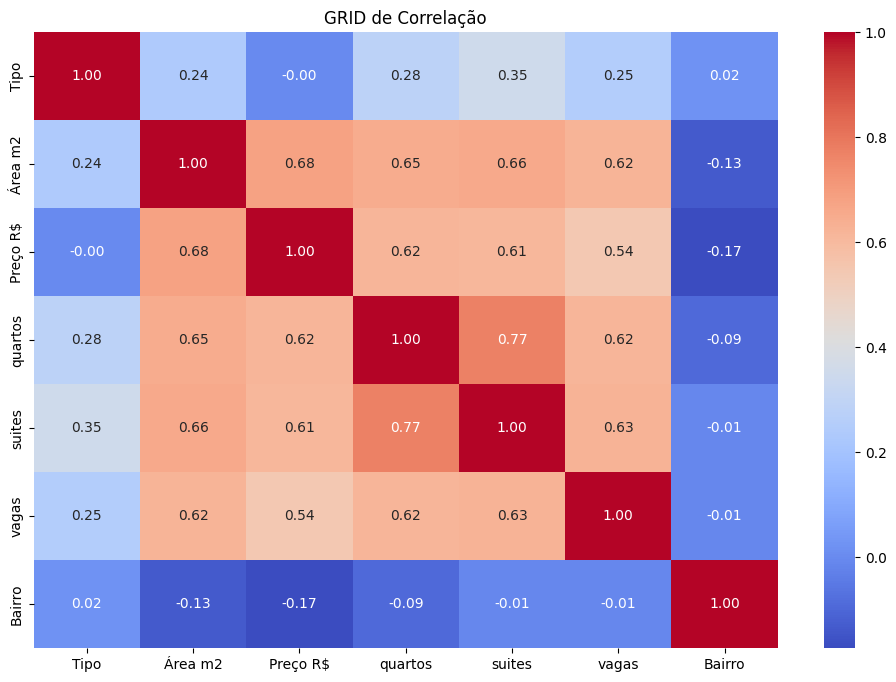

In [43]:
correlation_grid = data_filtrada.drop(columns=['Nome']).corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_grid, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('GRID de Correlação')
plt.show()


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data_filtrada.drop(columns=['Nome', 'Preço R$'])
y = data_filtrada['Preço R$']

#                                                                   20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

Mean Squared Error (MSE): 7221761.413270718
R² Score: 0.5816298385165481


In [45]:
# Coeficientes do modelo
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', ascending=False)

print(coeficientes)

  Variável  Coeficiente
3   suites   755.780079
2  quartos   372.586378
4    vagas   279.172533
1  Área m2     9.555172
5   Bairro  -193.705100
0     Tipo  -915.734911


In [46]:
correlation = data_filtrada[['quartos', 'suites']].corr()
print(correlation)

          quartos    suites
quartos  1.000000  0.773522
suites   0.773522  1.000000


In [47]:
correlation_tipo_preco = data_filtrada[['Tipo', 'Preço R$']].corr()
print(correlation_tipo_preco)

              Tipo  Preço R$
Tipo      1.000000 -0.003203
Preço R$ -0.003203  1.000000


C:\Users\marco\AppData\Local\Temp\ipykernel_7352\2028378306.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=preco_por_tipo, x='Tipo', y='Preço R$', palette='viridis')


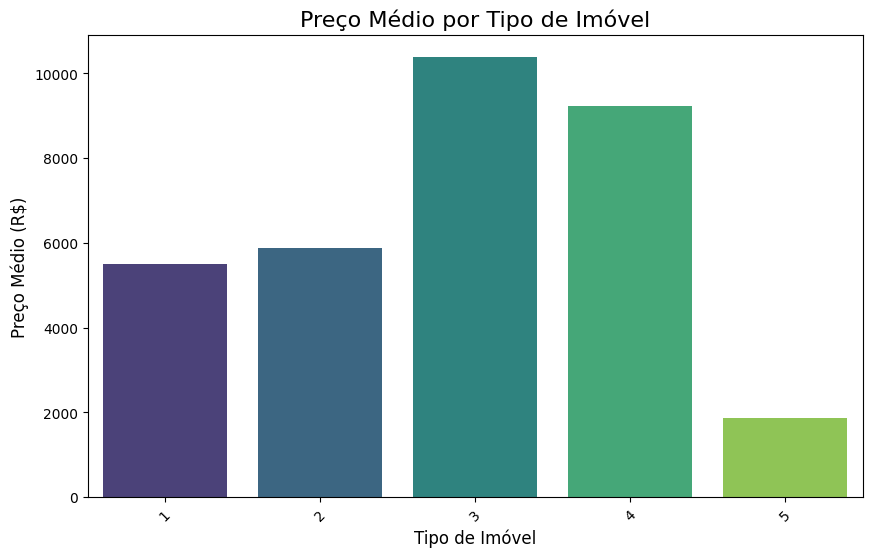

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

preco_por_tipo = data_filtrada.groupby('Tipo')['Preço R$'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=preco_por_tipo, x='Tipo', y='Preço R$', palette='viridis')

plt.title('Preço Médio por Tipo de Imóvel', fontsize=16)
plt.xlabel('Tipo de Imóvel', fontsize=12)
plt.ylabel('Preço Médio (R$)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

O preço médio das Kitnets por ser muito pequeno pode estar atrapalhando o modelo, vamos concentrar apenas nos outros tipos, para ela a abordagem teria que ser específica, em um contexto onde o tipo não interfira;

In [49]:
data_filtrada = data_filtrada[data_filtrada['Tipo'] != 'Kitnet']

print(data_filtrada['Tipo'].unique())

[1 4 3 2 5]


In [50]:
X = data_filtrada.drop(columns=['Nome', 'Preço R$'])
y = data_filtrada['Preço R$']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', ascending=False)

print(coeficientes)

Mean Squared Error (MSE): 7221761.413270718
R² Score: 0.5816298385165481
  Variável  Coeficiente
3   suites   755.780079
2  quartos   372.586378
4    vagas   279.172533
1  Área m2     9.555172
5   Bairro  -193.705100
0     Tipo  -915.734911


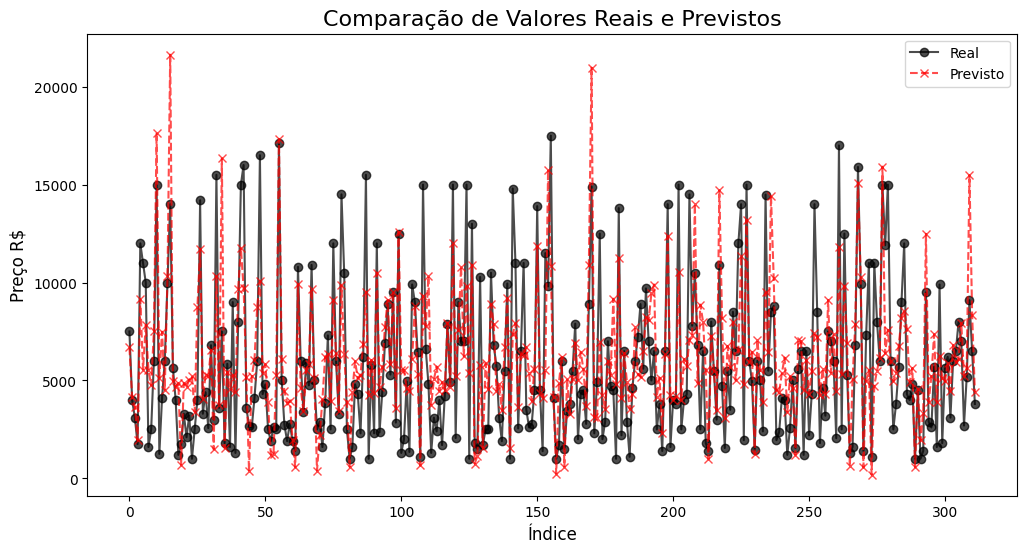

In [51]:
# Prever valores
y_pred = model.predict(X_test)

# Criar um DataFrame para comparar valores reais e previstos
comparison_df = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred
}).reset_index(drop=True)

# Gerar o gráfico
plt.figure(figsize=(12, 6))
plt.plot(comparison_df['Real'], label='Real', color='black', marker='o', linestyle='-', alpha=0.7)
plt.plot(comparison_df['Previsto'], label='Previsto', color='red', marker='x', linestyle='--', alpha=0.7)
plt.title('Comparação de Valores Reais e Previstos', fontsize=16)
plt.xlabel('Índice', fontsize=12)
plt.ylabel('Preço R$', fontsize=12)
plt.legend()
plt.show()

O meio da previsão está próximo, o modelo prevê algus erros grandes, numeros muito altos ou muito baixos, podemos usar alguns métodos para aparar como todos os valores previstos não podem passar o valor mais alto + 15% do mesmo ou o valor mais baixo + 15% do mesmo.

Com mais informações o modelo pode sim adequar para a previsão.